# Visualización y Machine Learning en epigenética

Repositorio con análisis exploratorio y visualización de exámenes de epigenética correspondientes a 62 pacientes. Se respetó la privacidad y confidencialidad de cada participante, no aparece ninguna característica vinculante a cualquiera de los resultado

Autor: alumno Eduardo Carlos Flets Aréchiga
e-mail. eduardo.fletes1892@alumnos.udg.mx

Profesor: Ramón Osvaldo Guardado Medina

### **Descripción Inicial del Notebook**

Este archivo es parte de la asignatura **"Visualización de Grandes Bases de Datos"**, de la **Maestría en Ciencia de los Datos** en la **Universidad de Guadalajara**. Su contenido está enfocado en analizar y visualizar datos categóricos relacionados con la salud de pacientes. Las principales tareas realizadas en este notebook incluyen:

---

#### **1. Análisis de los Datos**
- **Contexto de los datos**: 
  - Los datos son completamente categóricos.
  - Cada columna representa un atributo de salud, donde:
    - `0`: Indica normalidad en el paciente.
    - `1`: Representa un hallazgo fuera de las mediciones saludables, requiriendo atención.
- Verificación de tipos de datos: Asegurarse de que los datos sean homogéneos para un análisis preciso.

---

#### **2. Exploración y Visualización**
- **Distribución de datos**:
  - Visualización del conteo de valores `0` y `1` para cada columna, mostrando qué atributos presentan mayor incidencia.
  - Herramientas utilizadas: 
    - **Gráficos básicos** para la visualización inicial.
    - **Altair** para representaciones más detalladas.
- **Insights iniciales**:
  - Identificación de columnas con mayores valores fuera de rango (`1`), destacando las más relevantes para los hallazgos de salud, como `'ap'`, `'cs'`, y `'al'`.

---

#### **3. Análisis a Nivel de Pacientes**
- Evaluación de las filas que presentan más hallazgos críticos, analizando pacientes específicos que requieren mayor atención.

---

#### **Objetivo del Notebook**
El objetivo principal es demostrar la capacidad de:
1. Procesar datos categóricos en un contexto de salud.
2. Visualizar patrones relevantes que permitan priorizar la atención a pacientes.
3. Usar herramientas modernas de visualización para comunicar insights de forma efectiva.

---


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

file_path = r"C:\Users\eduar\Documents\epigen\epigen_nov1.csv"
# read the CSV file with latin1 encoding
data = pd.read_csv(file_path, encoding='latin1')

data.head()

,BETAINA,BIOTINA,INOSITOL,VIT_A1,VIT_ B2,VIT_B1,VIT_B3,VIT_B5,VIT_B6,VIT_B9,...,Campo_mag_constante,Microondas,GSM_0_9Ghz,GSM_1_8Ghz,Radiofrecuencia,corriente_tracción,pantalla_tv,pantalla_pc,50hz_corriente_entrada,Unnamed: 105
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,NaN
1,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,NaN
2,1,0,0,0,0,1,0,0,0,1,...,0,1,0,1,1,0,0,0,0,NaN
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,NaN


**Información de los datos**
Todos los datos son categóricos, lo cual muestra en cada valor del feature que, si aparece un 0, entonces es un hallazgo que representa normalidad en el paciente. Si aparece un número 1, esa característica aparece fuera de mediciones saludables y necesita corregirse.

In [32]:
# Display basic statistics of the dataset
print(data.describe())



        BETAINA     BIOTINA   INOSITOL     VIT_A1    VIT_ B2     VIT_B1  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean    0.213115   0.245902   0.180328   0.098361   0.229508   0.213115   
std     0.412907   0.434194   0.387651   0.300273   0.424006   0.412907   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

          VIT_B3     VIT_B5     VIT_B6     VIT_B9  ...  Campo_mag_constante  \
count  61.000000  61.000000  61.000000  61.000000  ...            61.000000   
mean    0.163934   0.098361   0.196721   0.114754  ...             0.344262   
std     0.373288   0.300273   0.400819   0.321370  ...             0.479070   
min     

## Verificando que todos los tipos de datos sean iguales

In [33]:
# Display the data types of each column
print(data.dtypes)

BETAINA                     int64
BIOTINA                     int64
INOSITOL                    int64
VIT_A1                      int64
VIT_ B2                     int64
                           ...   
corriente_tracción          int64
pantalla_tv                 int64
pantalla_pc                 int64
50hz_corriente_entrada      int64
Unnamed: 105              float64
Length: 106, dtype: object


In [4]:
# check for non numeric values
print(data.select_dtypes(include=['object']))


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

[61 rows x 0 columns]


In [5]:
# Check for missing values
print(data.isnull().sum())

BETAINA                   0
BIOTINA                   0
INOSITOL                  0
VIT_A1                    0
VIT_ B2                   0
                         ..
Radiofrecuencia           0
corriente_tracción        0
pantalla_tv               0
pantalla_pc               0
50hz_corriente_entrada    0
Length: 105, dtype: int64


### Este plot muestra la distribución de los datos

Ya que los datos son categoricos, se muestra el *count* de cada columna para sumar cuántos tienen el valor '0', cuántos el '1'.

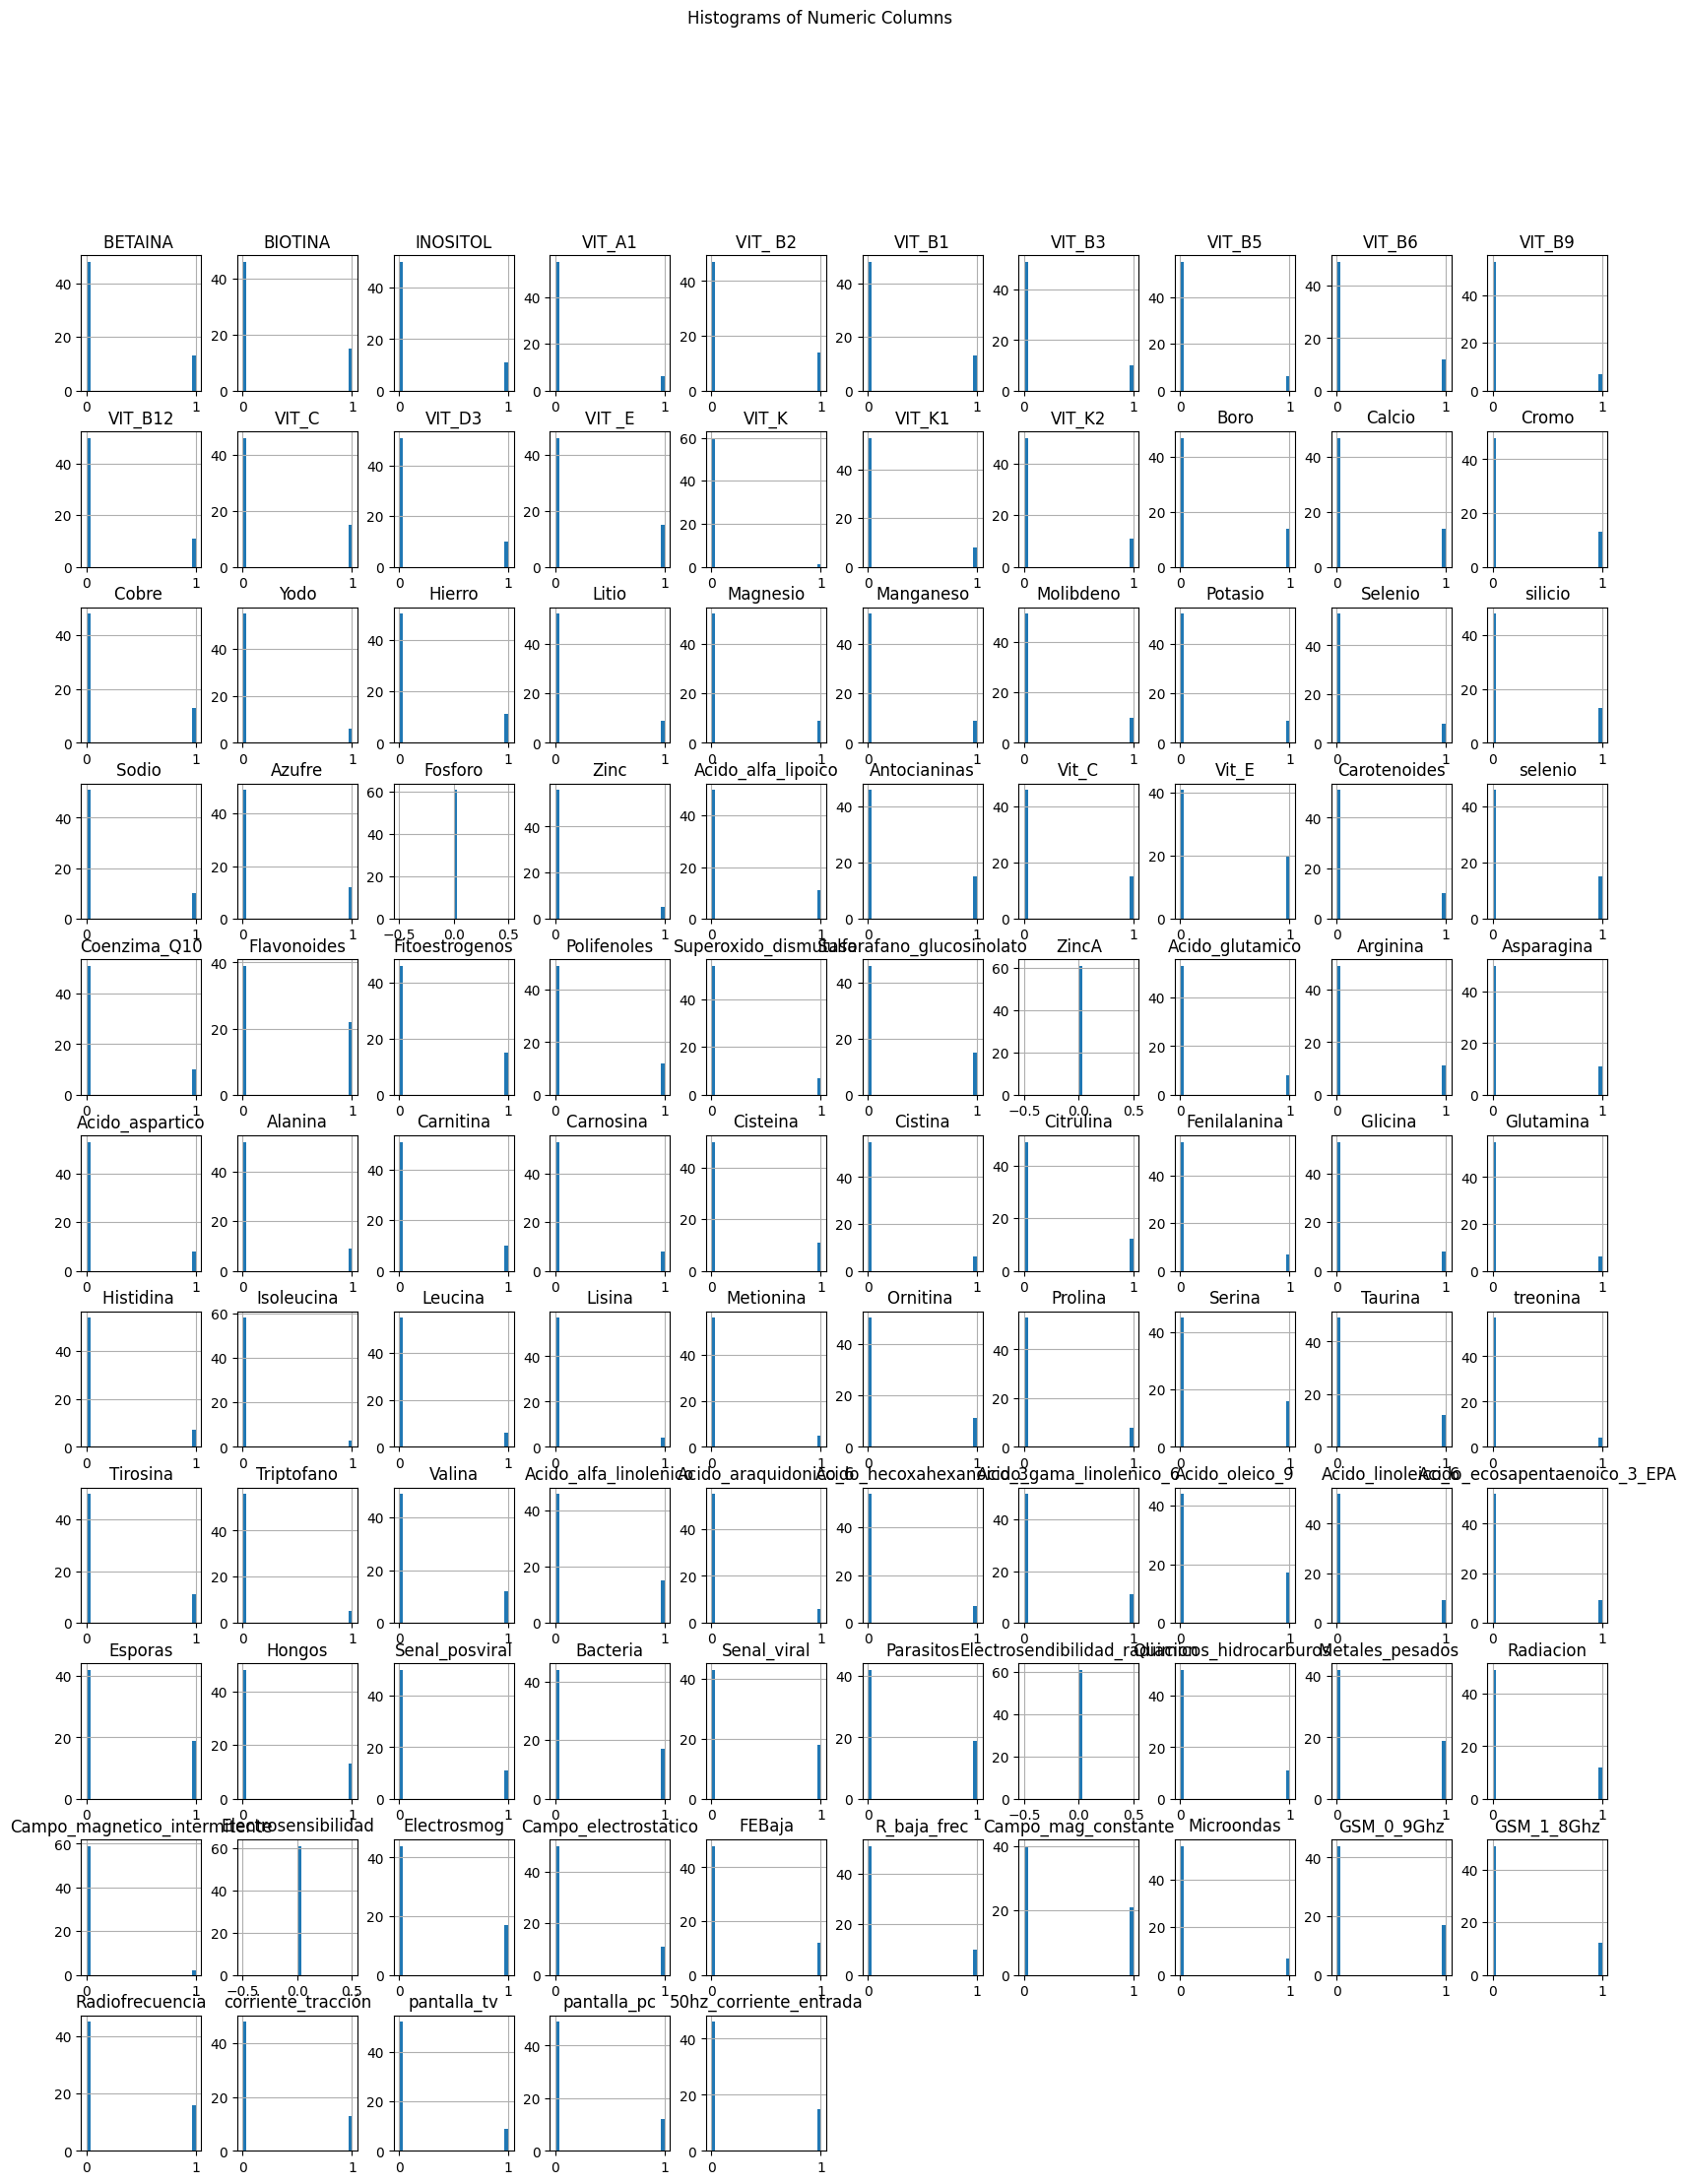

In [6]:
# Plot histograms for each numeric column
data.hist(figsize=(20, 25), bins=30)
plt.suptitle('Histograms of Numeric Columns')
plt.show()


************************************************************************************************************

## Aquí se aprecia cómo los valores más altos para la ocurrencia es en las columnas 'ap', 'cs', and 'al'

sum of values to see how many people need to pay attention to each feature

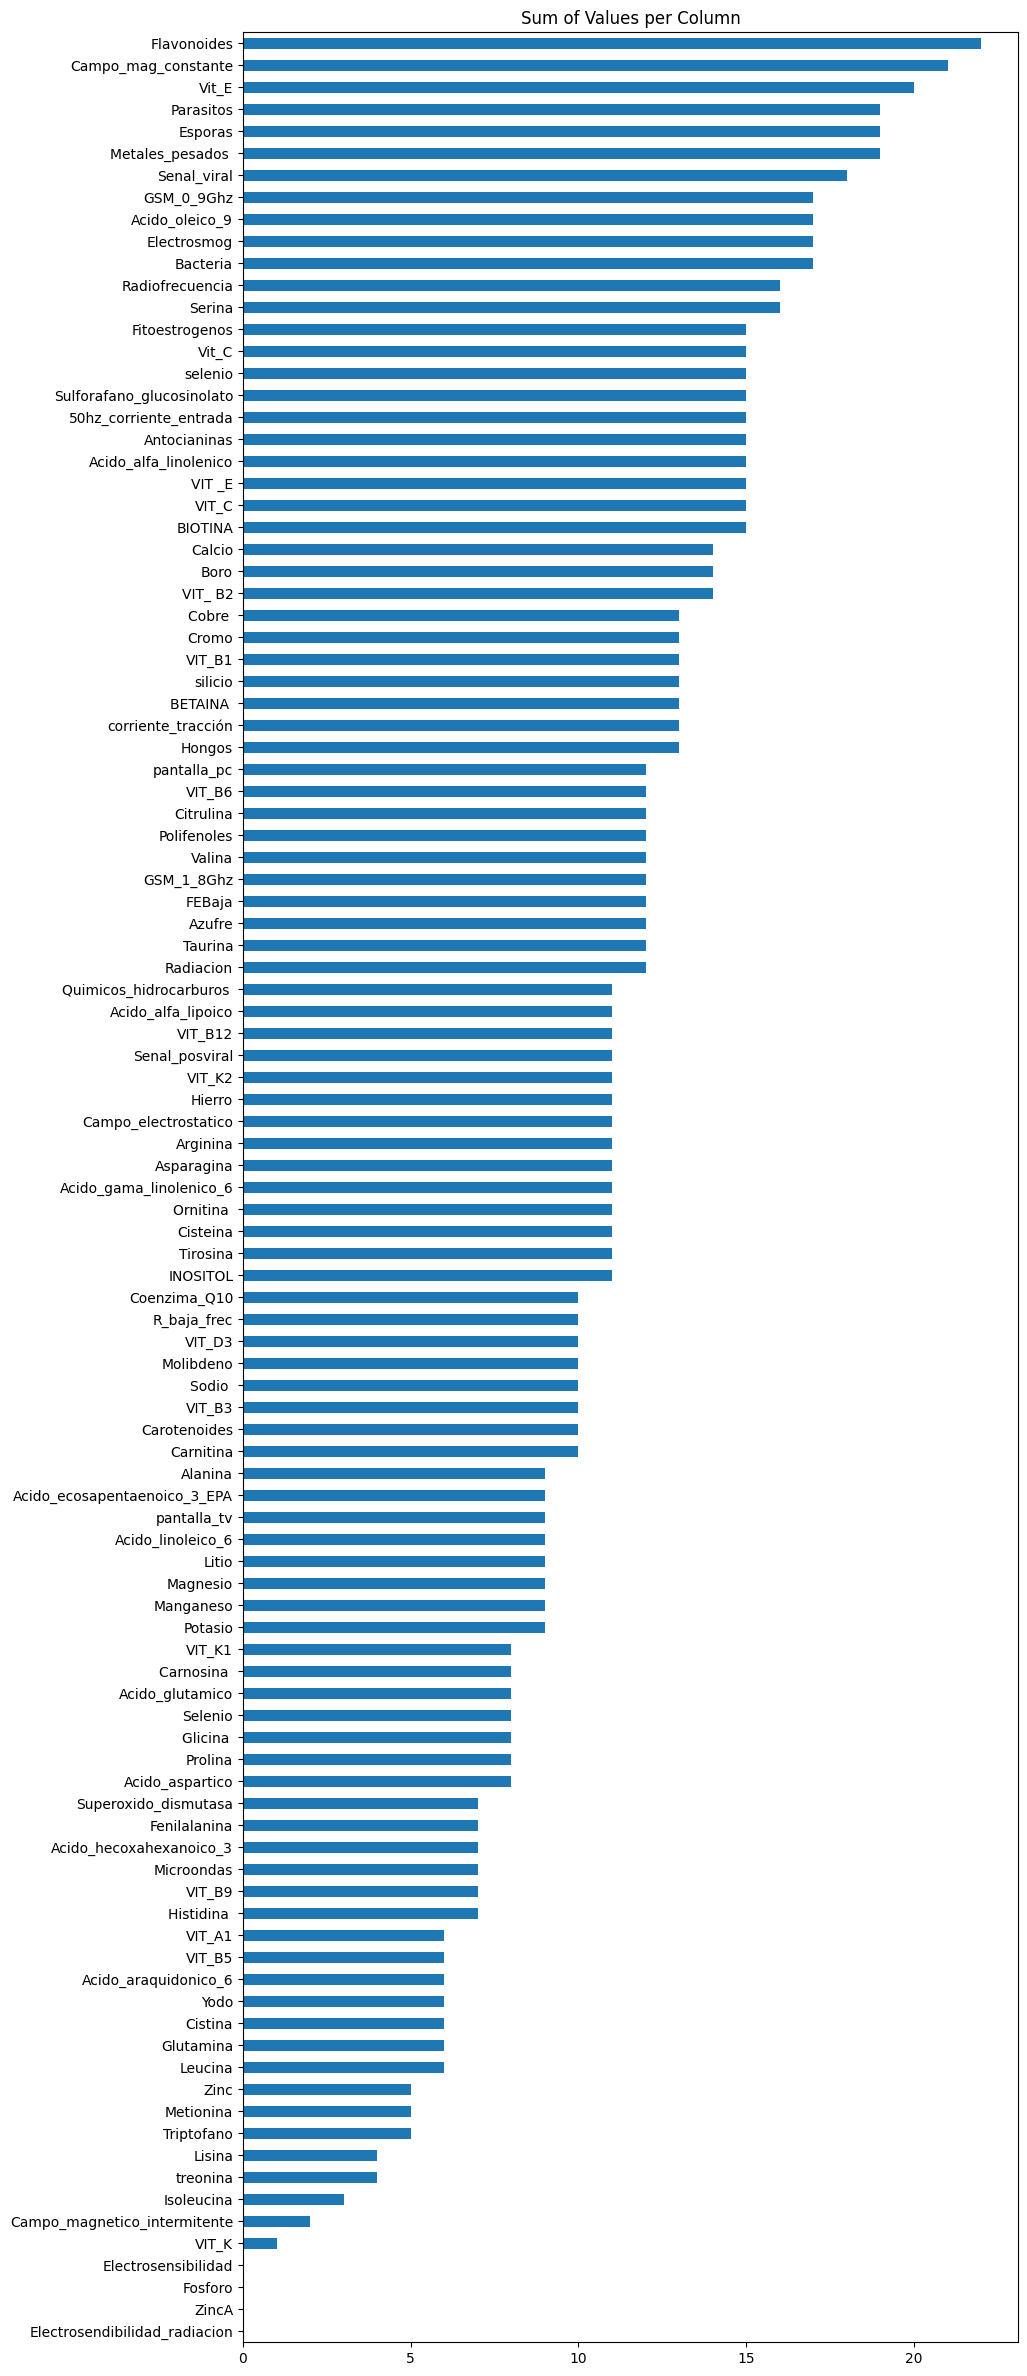

In [7]:
# calculate sum of values per column and plot horizontal bar chart
sums = data.sum()
sums = sums.sort_values(ascending=True)
sums.plot(kind='barh', figsize=(10, 30))
plt.title('Sum of Values per Column')
plt.show()




## Misma suma de valores pero, usando Altair en esta ocasión

In [8]:

import altair as alt
sums = data.sum()
sums = sums.sort_values(ascending=True)
sums = sums.reset_index()
sums.columns = ['Column', 'Sum']
bars = alt.Chart(sums).mark_bar().encode(
    x='Sum',
    y=alt.Y('Column', sort='-x')
)
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=4
).encode(
    text='Sum'
)
chart = (bars + text).properties(height=1300)
chart.show()


alt.LayerChart(...)

## Condiciones de salud por fila (paciente)

En este caso, la fila 17, 25, 48 y 4 (correspondiendo cada fila a un paciente), son más propensos a estar en un *peor estado de salud* debido a la presencia de más características a mejorar en sus resultados provistos.

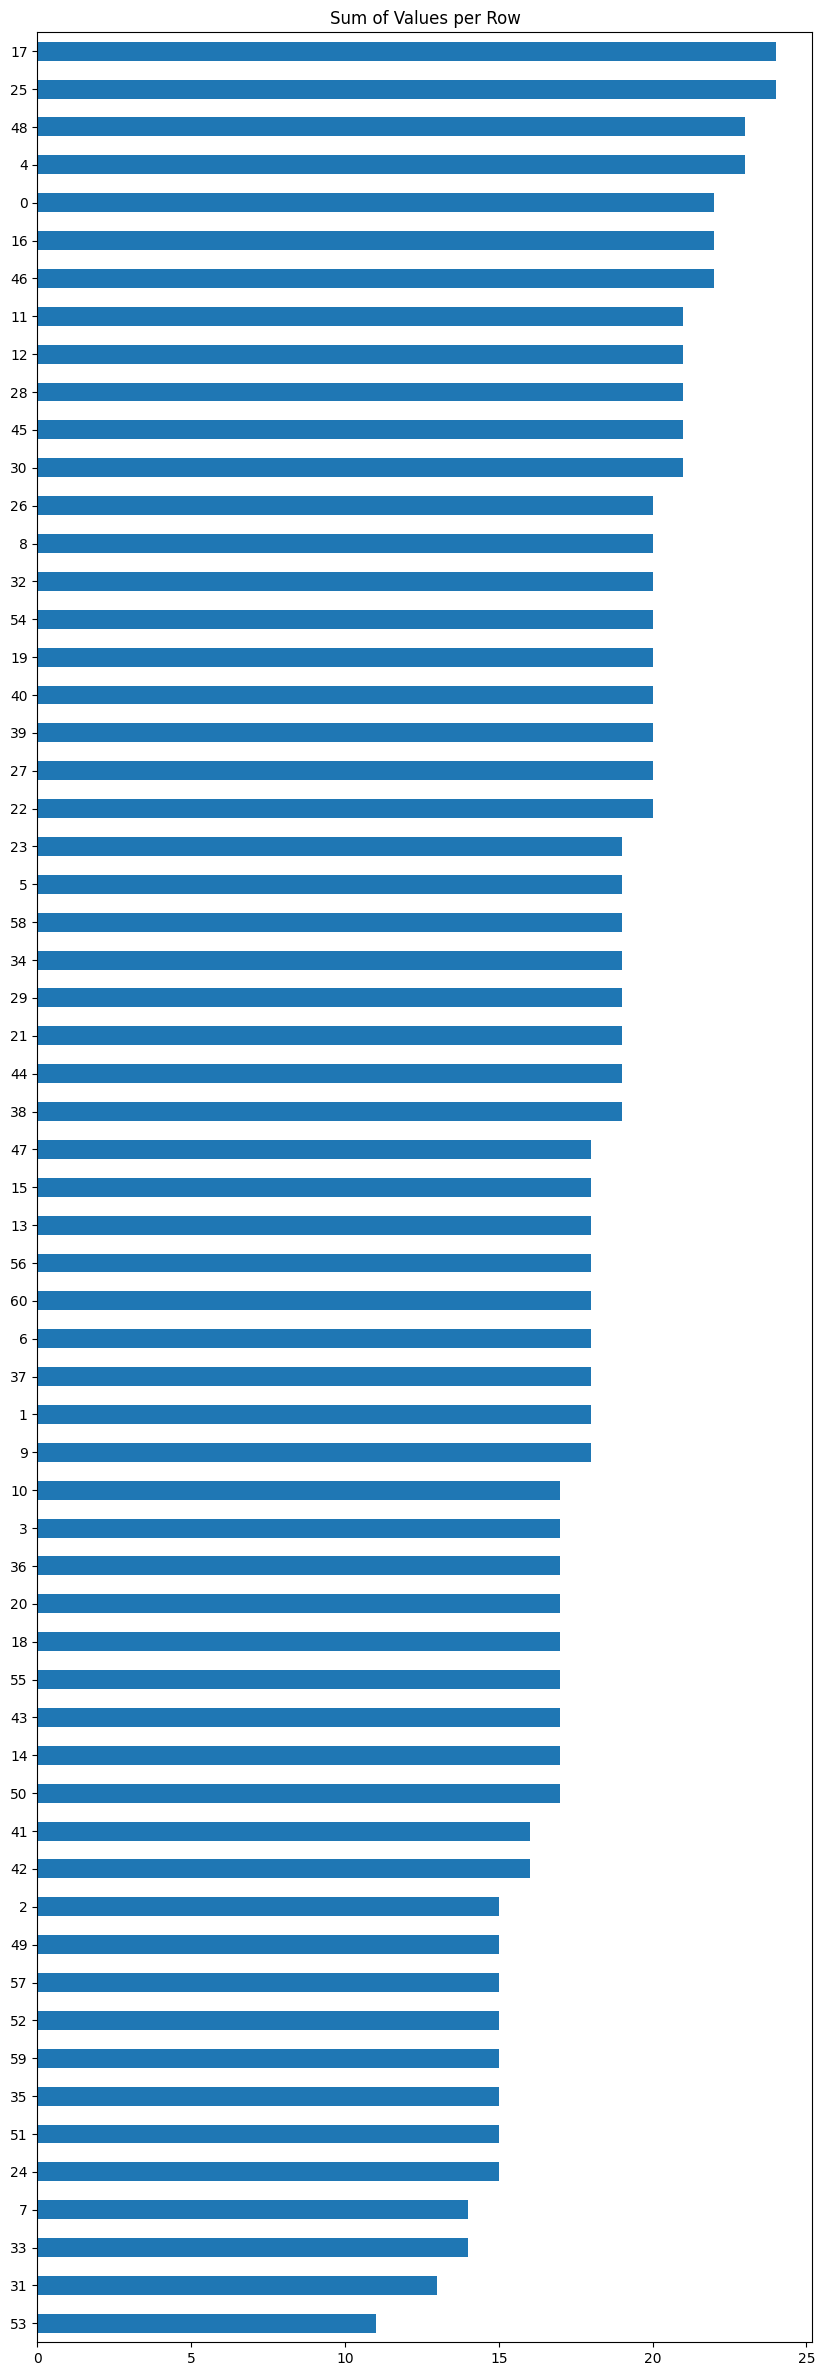

In [9]:
# sum values per row and plot horizontal bar chart
person_conditions = data.sum(axis=1)
person_conditions = person_conditions.sort_values(ascending=True)
person_conditions.plot(kind='barh', figsize=(10, 30))
plt.title('Sum of Values per Row')
plt.show()


## Segmentación de los datos

### Visualización de los datos según su categoría

Se usa Altair y Seaborn

Algunos pacientes tienen menos número de aspectos a mejorar y, al contrario, parece que hay otro grupo que tiene muchos aspectos mal.
Se usa una clasificación categórica en lugar de booleana para agrupar en tres distintos grupos. los que tienen de 11 a 15 para 'healthy', los que tienen de 16 a 20 'mild' y, los que tienen más de 20 'severe'.

In [10]:
# segmentation of data

data['total_conditions'] = person_conditions
# patient segmentation based on total conditions, healthy (11-15), milt (16-20), severe (21-25)
data['patient_type'] = pd.cut(data['total_conditions'], bins=[10, 15, 20, 25], labels=['Healthy', 'Mild', 'Severe'])
print(data['patient_type'].value_counts())

Mild       37
Healthy    12
Severe     12
Name: patient_type, dtype: int64


C:\Users\eduar\AppData\Local\Temp\ipykernel_23640\3592745882.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['patient_type'], palette='coolwarm')


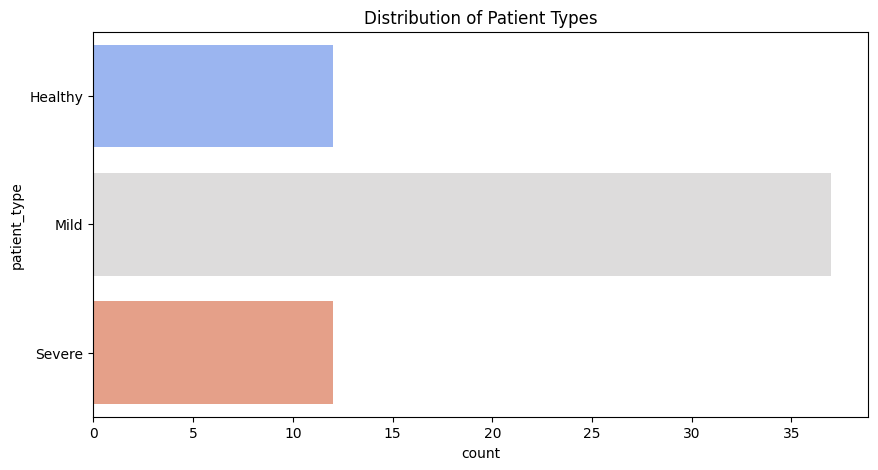

In [11]:
# visualize the distribution of patient types, use different colors for each type
plt.figure(figsize=(10, 5))
sns.countplot(data['patient_type'], palette='coolwarm')
plt.title('Distribution of Patient Types')
plt.show()



# Altair
Intento generar distintos tipos de visualización para presentar la mejor versión final del proyecto.

In [12]:
# visualize the distribution of patients types using altair
patient_types = data['patient_type'].value_counts().reset_index()
patient_types.columns = ['Patient Type', 'Count']
bars = alt.Chart(patient_types).mark_bar().encode(
    x='Count',
    y=alt.Y('Patient Type', sort='-x'),
    color='Patient Type'
)
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=6
).encode(
    text='Count'
)
chart = (bars + text).properties(height=400)
chart.show()



alt.LayerChart(...)

# Generación de pares en una matríz de correlación

cuáles features tienden a aparecer juntos a otros, esta imagen representan los pares en el dataset

# Triples ocurrencias

Ahora presento las veces que tres mismos features aparecen al mismo tiempo para un paciente.
itertools.combinations(features, 3) genera todas las posibles combinaciones para tres características.

Aquí sólo se muestran las primeras 20 tripletas generadas, en futuros análisis debería de considerarse el uso de un umbral para la lista completa de las ocurrencias.


In [15]:
import itertools
from collections import defaultdict

# generation for all possible pairs of features
features = data.columns
pairs = list(itertools.combinations(features, 2))

# generation of a dictionary to store the co-occurrence count of each pair
pairs_co_occurrence_count = defaultdict(int)

# counting the co-occurrence of each pair
for index, row in data.iterrows():
    for pair in pairs:
        if row[pair[0]] == 1 and row[pair[1]] == 1:
            pairs_co_occurrence_count[pair] += 1

# convert the dictionary to a DataFrame
pairs_co_occurrence_df = pd.DataFrame(list(pairs_co_occurrence_count.items()), columns=['pair', 'Co-occurrence Count'])

# co-occurrence count in descending order
pairs_co_occurrence_df = pairs_co_occurrence_df.sort_values(by='Co-occurrence Count', ascending=False)

# show the top 20 pairs with the highest co-occurrence count
print(pairs_co_occurrence_df.head(20))

                                                pair  Co-occurrence Count
265                                  (VIT _E, Vit_E)                   11
133                    (Flavonoides, Acido_oleico_9)                   10
318               (Flavonoides, Campo_mag_constante)                   10
933                   (Vit_E, Acido_alfa_linolenico)                    9
877                                   (VIT_C, Vit_C)                    9
830                   (Esporas, Campo_mag_constante)                    8
1436              (Electrosmog, Campo_mag_constante)                    8
364   (Quimicos_hidrocarburos , Campo_mag_constante)                    8
1807                            (silicio, Citrulina)                    8
355            (Acido_oleico_9, Campo_mag_constante)                    8
1234                      (VIT _E, Metales_pesados )                    8
1734          (Sulforafano_glucosinolato, Parasitos)                    8
126                    (Flavonoides, F

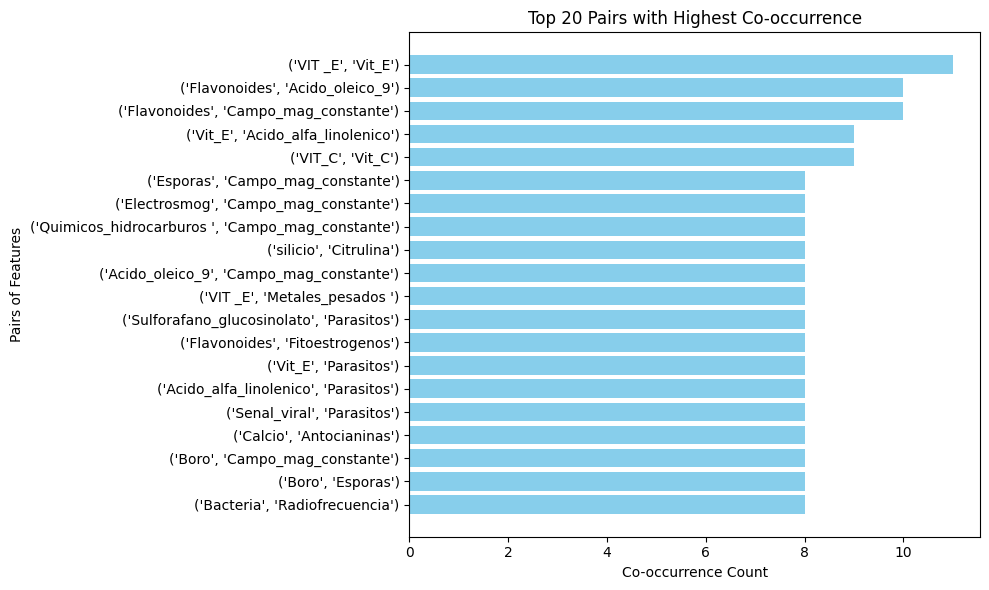

In [17]:
# Visualización de los 20 pares con mayor co-ocurrencia
import matplotlib.pyplot as plt

# Seleccionar los top 20 pares con mayor co-ocurrencia
top_20_pairs = pairs_co_occurrence_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh([str(pair) for pair in top_20_pairs['pair']], top_20_pairs['Co-occurrence Count'], color='skyblue')

plt.xlabel('Co-occurrence Count')
plt.ylabel('Pairs of Features')
plt.title('Top 20 Pairs with Highest Co-occurrence')

# Ajustar las etiquetas para mejor legibilidad
plt.gca().invert_yaxis()  # Invertir el eje Y para que el top esté en la parte superior
plt.tight_layout()

plt.show()


In [ ]:
# generation for all possible triples of features
features = data.columns
triples = list(itertools.combinations(features, 3))

# generation of a dictionary to store the co-occurrence count of each triple
triple_co_occurrence_count = defaultdict(int)

# counting the co-occurrence of each triple
for index, row in data.iterrows():
    for triple in triples:
        if row[triple[0]] == 1 and row[triple[1]] == 1 and row[triple[2]] == 1:
            triple_co_occurrence_count[triple] += 1

# convert the dictionary to a DataFrame
triple_co_occurrence_df = pd.DataFrame(list(triple_co_occurrence_count.items()), columns=['Triple', 'Co-occurrence Count'])

# co-occurrence count in descending order
triple_co_occurrence_df = triple_co_occurrence_df.sort_values(by='Co-occurrence Count', ascending=False)

# show the top 20 triples with the highest co-occurrence count
print(triple_co_occurrence_df.head(20))

#check for clusters of features

                                                  Triple  Co-occurrence Count
2163   (Flavonoides, Acido_oleico_9, Campo_mag_consta...                    6
5171                    (Serina, Senal_viral, Parasitos)                    6
9512              (VIT _E, Vit_E, Acido_alfa_linolenico)                    5
1677                            (VIT_ B2, VIT _E, Vit_E)                    5
12673  (silicio, Acido_gama_linolenico_6, Metales_pes...                    5
1678                     (VIT_ B2, VIT _E, Coenzima_Q10)                    5
5204   (Esporas, Quimicos_hidrocarburos , Campo_mag_c...                    5
1812                     (VIT _E, Vit_E, Fitoestrogenos)                    5
25143   (Coenzima_Q10, Electrosmog, Campo_mag_constante)                    5
1705                      (VIT_ B2, Vit_E, Coenzima_Q10)                    5
7005           (BETAINA , Metales_pesados , pantalla_pc)                    5
4555                          (Selenio, selenio, Serina)        

## Visualización de la celda anterior

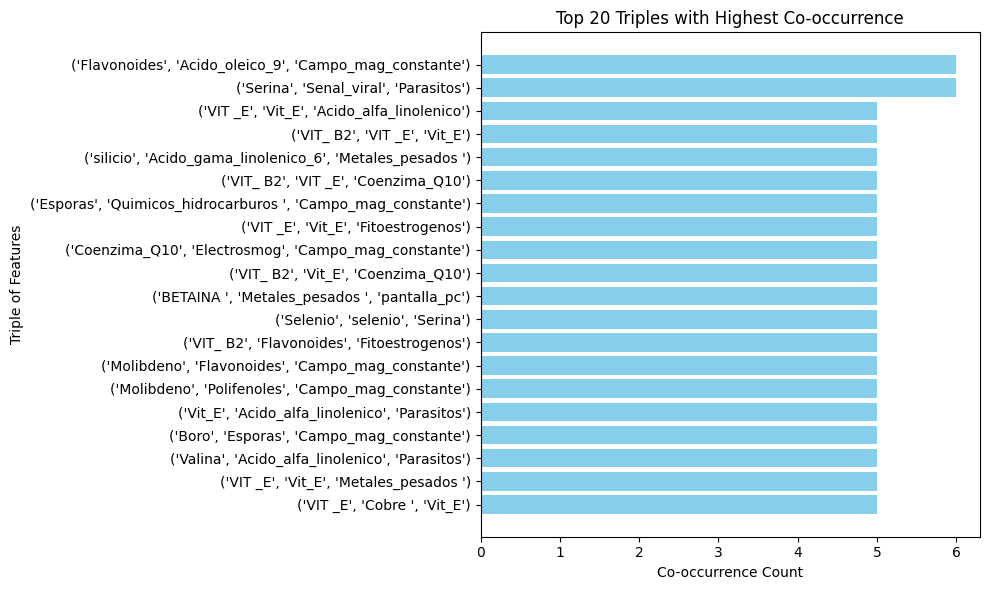

In [22]:
# Visualización de los 20 triples con mayor co-ocurrencia
import matplotlib.pyplot as plt

# Seleccionar los top 20 triples con mayor co-ocurrencia
top_20_triples = triple_co_occurrence_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh([str(triple) for triple in top_20_triples['Triple']], top_20_triples['Co-occurrence Count'], color='skyblue')

plt.xlabel('Co-occurrence Count')
plt.ylabel('Triple of Features')
plt.title('Top 20 Triples with Highest Co-occurrence')

# Ajustar las etiquetas para mejor legibilidad
plt.gca().invert_yaxis()  # Invertir el eje Y para que el top esté en la parte superior
plt.tight_layout()

plt.show()


In [21]:
# use GPU for faster processing if available. If not, use CPU
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))


Using cuda device


In [22]:
# generation for all possible quadruplets of features
features = data.columns
quadruplets = list(itertools.combinations(features, 4))

# generation of a dictionary to store the co-occurrence count of each triple
quadruplets_co_occurrence_count = defaultdict(int)

# counting the co-occurrence of each quadruplet
for index, row in data.iterrows():
    for quadruplet in quadruplets:
        if row[quadruplet[0]] == 1 and row[quadruplet[1]] == 1 and row[quadruplet[2]] == 1 and row[quadruplet[3]] == 1:
            quadruplets_co_occurrence_count[quadruplet] += 1

# convert the dictionary to a DataFrame
quadruplets_co_occurrence_df = pd.DataFrame(list(quadruplets_co_occurrence_count.items()), columns=['Quadruplets', 'Co-occurrence Count'])

# co-occurrence count in descending order
quadruplets_co_occurrence_df = quadruplets_co_occurrence_df.sort_values(by='Co-occurrence Count', ascending=False)

# show the top 20 quadruplets with the highest co-occurrence count
print(quadruplets_co_occurrence_df.head(20))

                                              Quadruplets  Co-occurrence Count
55117   (silicio, Citrulina, Acido_gama_linolenico_6, ...                    4
106257              (VIT_C, Potasio, Valina, Electrosmog)                    4
40925   (Vit_E, Valina, Acido_alfa_linolenico, Parasitos)                    4
8009               (VIT_ B2, VIT _E, Vit_E, Coenzima_Q10)                    4
15911       (VIT_ B2, Cromo, Flavonoides, Fitoestrogenos)                    4
103029  (BETAINA , Acido_gama_linolenico_6, Metales_pe...                    3
39420   (INOSITOL, VIT _E, Acido_alfa_linolenico, Para...                    3
8677         (VIT _E, Vit_E, Fitoestrogenos, pantalla_pc)                    3
8678    (VIT _E, Vit_E, Fitoestrogenos, 50hz_corriente...                    3
91313   (Flavonoides, Polifenoles, Campo_mag_constante...                    3
55121        (silicio, Citrulina, Senal_viral, Parasitos)                    3
24029              (BIOTINA, Calcio, Serina, Senal_v

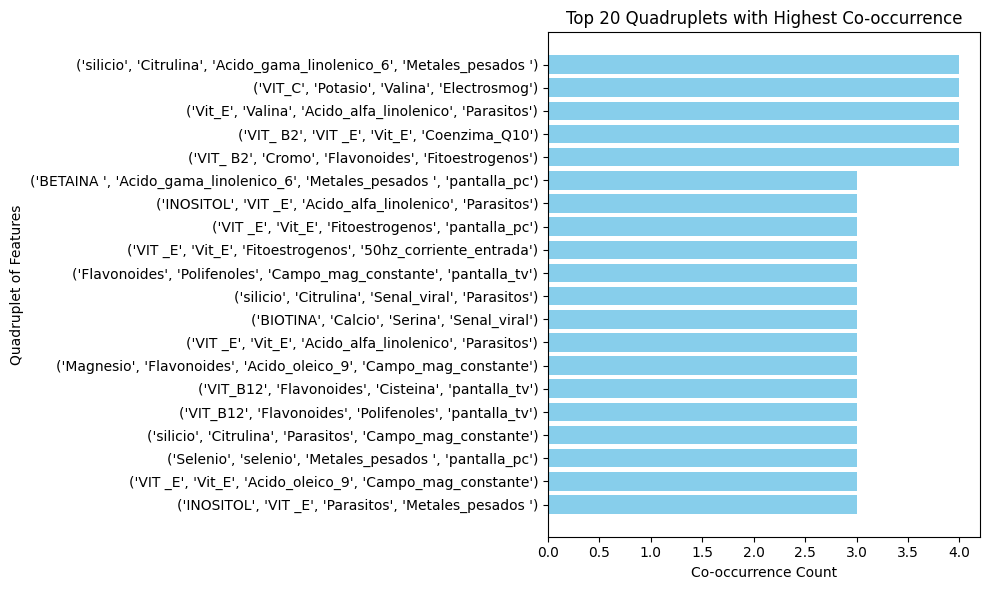

In [23]:
# visualización de los top 20 cuadrupletas con mayor co-ocurrencia
import matplotlib.pyplot as plt

# Seleccionar los top 20 cuadrupletas con mayor co-ocurrencia
top_20_quadruplets = quadruplets_co_occurrence_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh([str(quadruplet) for quadruplet in top_20_quadruplets['Quadruplets']], top_20_quadruplets['Co-occurrence Count'], color='skyblue')

plt.xlabel('Co-occurrence Count')
plt.ylabel('Quadruplet of Features')
plt.title('Top 20 Quadruplets with Highest Co-occurrence')

# Ajustar las etiquetas para mejor legibilidad
plt.gca().invert_yaxis()  # Invertir el eje Y para que el top esté en la parte superior
plt.tight_layout()


plt.show()

# Agrupación a través de un dedrograma

El **dendograma** es una representación visual de las relaciones jerárquicas entre las condiciones de salud. Las condiciones que se agrupan más cercanas en las ramas del dendograma están más relacionadas entre sí (en este caso, más correlacionadas), lo que indica que tienden a ocurrir juntas en los pacientes.

### Interpretación del dendograma:
1. **Eje Y (Distancia)**: La altura en el eje Y representa la "distancia" o disimilitud entre las condiciones de salud. Cuanto más cerca estén dos condiciones en el dendograma (menor altura en la que sus ramas se unen), más correlacionadas o similares están.
   
2. **Ramas y uniones**: 
   - Las condiciones de salud se agrupan jerárquicamente en función de su similitud. Las ramas más cortas representan condiciones que están más relacionadas.
   - Cuando dos condiciones se unen en una rama baja, significa que tienen una alta correlación (aparecen frecuentemente juntas en los pacientes).

3. **Agrupaciones**: 
   - Las condiciones que se agrupan en los niveles más bajos del dendograma son las que tienen una relación más fuerte y podrían requerir intervenciones conjuntas.
   - Las ramas que se unen más arriba representan grupos de condiciones que son más disímiles entre sí.

### Claves para entender el dendograma:
- **Condiciones que están correlacionadas**: Las condiciones que se agrupan en la parte inferior (se conectan a través de ramas cortas) tienden a aparecer juntas en los pacientes.
- **Condiciones más aisladas**: Si hay ramas que se conectan más arriba, estas condiciones están menos relacionadas con las demás.

### Ejemplo de interpretación:
- Si se ven varias condiciones que se conectan en una rama baja, esto podría sugerir que esas condiciones suelen presentarse juntas en los pacientes y podrían estar relacionadas de alguna manera (por ejemplo, problemas metabólicos que ocurren juntos, que en este caso no corresponde presentarlo al ser sólo exploratorio).

El **dendograma** te ayuda a identificar visualmente estos grupos y patrones de co-ocurrencia de condiciones de salud.


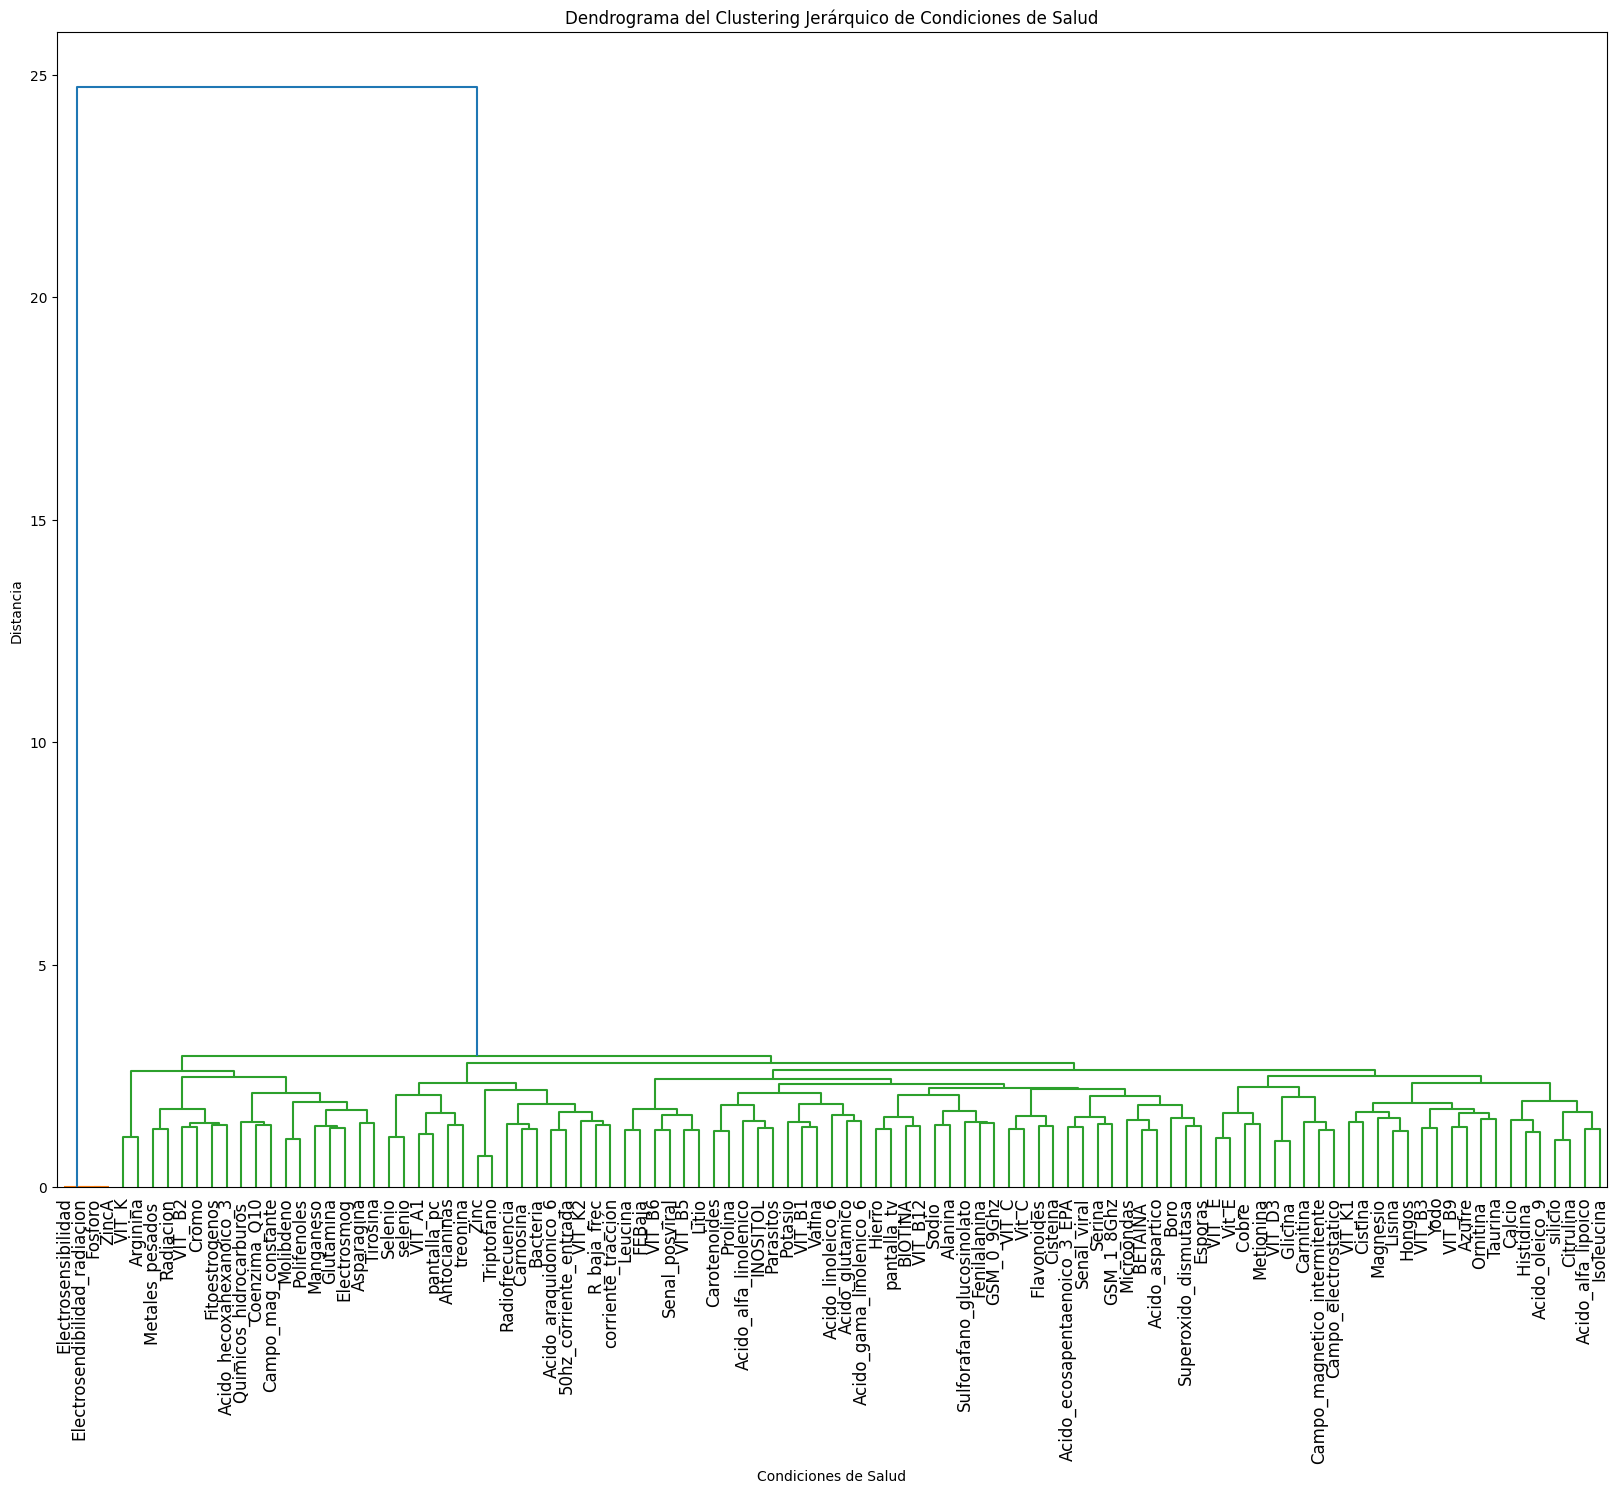

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Filtrar columnas basadas en las condiciones de salud (sin 'total_conditions' ni 'patient_type')
conditions_data = data.drop(columns=['total_conditions', 'patient_type'], errors='ignore')

# Calcular la matriz de correlación entre las condiciones
conditions_corr = conditions_data.corr().abs()

# Convertir la matriz de correlación en una matriz de distancias (1 - correlación)
conditions_distance = 1 - conditions_corr

# Reemplazar NaN e infinitos por ceros
conditions_distance = conditions_distance.fillna(0).replace([np.inf, -np.inf], 0)

# Aplicar clustering jerárquico (con pdist para convertir la matriz en un vector de distancias)
Z = linkage(pdist(conditions_distance), method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(20, 15))
dendrogram(Z, labels=conditions_data.columns, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrograma del Clustering Jerárquico de Condiciones de Salud')
plt.xlabel('Condiciones de Salud')
plt.ylabel('Distancia')
plt.show()
